In [7]:
import pandas as pd

# Load the dataset from the provided file
file_path = 'SAt6.xlsx'
xls = pd.ExcelFile(file_path)

# Check sheet names to understand the structure
xls.sheet_names

# Load the data from the first sheet
df = pd.read_excel(file_path, sheet_name='raw')

# Display the first few rows of the dataframe to understand its structure
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,False Alarm,Correct reject,100 hit,100 missed,80 hits,80 missed,60 hits,...,del2hit100,del2miss100,del2hit80,del2miss80,del2hit60,del2miss60,del2hit40,del2miss40,del2hit20,del2miss20
0,NaN,ST,377,12.600000,96.400000,9.20,6.200000,9.200000,6.600000,6.200000,...,-2826.715714,-3222.808333,-2726.694017,-3111.348571,-2784.957143,-3094.332051,-2876.296667,-3068.577040,-2832.277778,-3142.877273
1,NaN,ST,378,27.166667,82.333333,9.00,6.500000,8.000000,8.000000,7.000000,...,-2848.082792,-3607.387500,-2787.990741,-3694.713474,-2756.806157,-3733.226190,-2764.854167,-3617.574074,-2799.752315,-3426.317460
2,NaN,ST,381,17.125000,90.250000,10.75,5.000000,8.000000,7.500000,7.750000,...,-3040.135136,-3554.110417,-2891.516440,-3451.203869,-3037.259334,-3483.273363,-2908.066468,-3511.348530,-3013.904018,-3429.752232
3,NaN,ST,383,14.333333,96.833333,10.50,5.333333,8.333333,7.666667,7.666667,...,-2867.036027,-3136.422619,-2832.157407,-3054.546825,-2907.372685,-2996.301587,-2945.840278,-2931.952002,-2899.940476,-2985.710648
4,NaN,ST,397,12.857143,99.000000,9.00,6.857143,9.571429,6.285714,8.142857,...,-3460.751728,-3211.989796,-2910.048495,-3260.979592,-2839.799938,-3249.065934,-2944.397817,-3268.062734,-3041.208333,-3239.585343


In [8]:
# Clean the dataset: rename columns for better understanding, and drop unnecessary columns
df_cleaned = df.rename(columns={
    'Unnamed: 1': 'Phenotype',
    'Unnamed: 2': 'Animal ID',
    'False Alarm': 'False Alarm',
    'Correct reject': 'Correct Reject'
})

# Filter only necessary columns: Phenotype, Animal ID, False Alarm, and Correct Reject
df_filtered = df_cleaned[['Phenotype', 'Animal ID', 'False Alarm', 'Correct Reject']]

# Group the data by Phenotype and calculate the mean and standard deviation for False Alarm and Correct Reject
grouped_data = df_filtered.groupby('Phenotype').agg(
    {'False Alarm': ['mean', 'std'], 'Correct Reject': ['mean', 'std']}
).reset_index()

# Display the grouped data
grouped_data


Phenotype False Alarm           Correct Reject          
                   mean       std           mean       std
0        GT   12.068452  1.027516      93.540625  6.870312
1        IN   12.739560  4.114302      93.909890  6.992036
2        ST   14.214737  5.662884      94.280574  6.170030

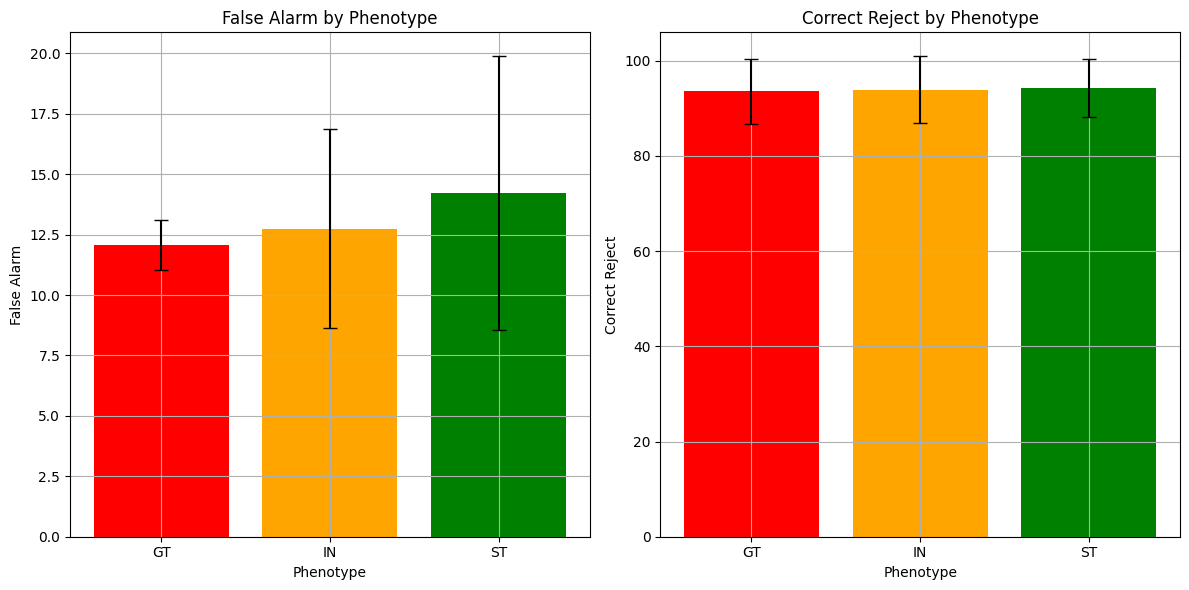

In [9]:
import matplotlib.pyplot as plt

# Set colors for the phenotypes
colors = {'GT': 'red', 'IN': 'orange', 'ST': 'green'}

# Create a bar plot for False Alarm and Correct Reject with error bars for standard deviation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# False Alarm plot
ax1.bar(grouped_data['Phenotype'], grouped_data['False Alarm', 'mean'], 
        yerr=grouped_data['False Alarm', 'std'], 
        color=[colors[phenotype] for phenotype in grouped_data['Phenotype']],
        capsize=5)
ax1.set_title('False Alarm by Phenotype')
ax1.set_xlabel('Phenotype')
ax1.set_ylabel('False Alarm')
ax1.grid(True)

# Correct Reject plot
ax2.bar(grouped_data['Phenotype'], grouped_data['Correct Reject', 'mean'], 
        yerr=grouped_data['Correct Reject', 'std'], 
        color=[colors[phenotype] for phenotype in grouped_data['Phenotype']],
        capsize=5)
ax2.set_title('Correct Reject by Phenotype')
ax2.set_xlabel('Phenotype')
ax2.set_ylabel('Correct Reject')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Index(['Unnamed: 0', 'Phenotype', 'Animal ID', 'False Alarm', 'Correct Reject',
       '100 hit', '100 missed', '80 hits', '80 missed', '60 hits', '60 missed',
       '40 hits ', '40 missed', '20 hits', '20 missed', 'Ommision', 'del2FA',
       'del2CR', 'del2hit100', 'del2miss100', 'del2hit80', 'del2miss80',
       'del2hit60', 'del2miss60', 'del2hit40', 'del2miss40', 'del2hit20',
       'del2miss20'],
      dtype='object')


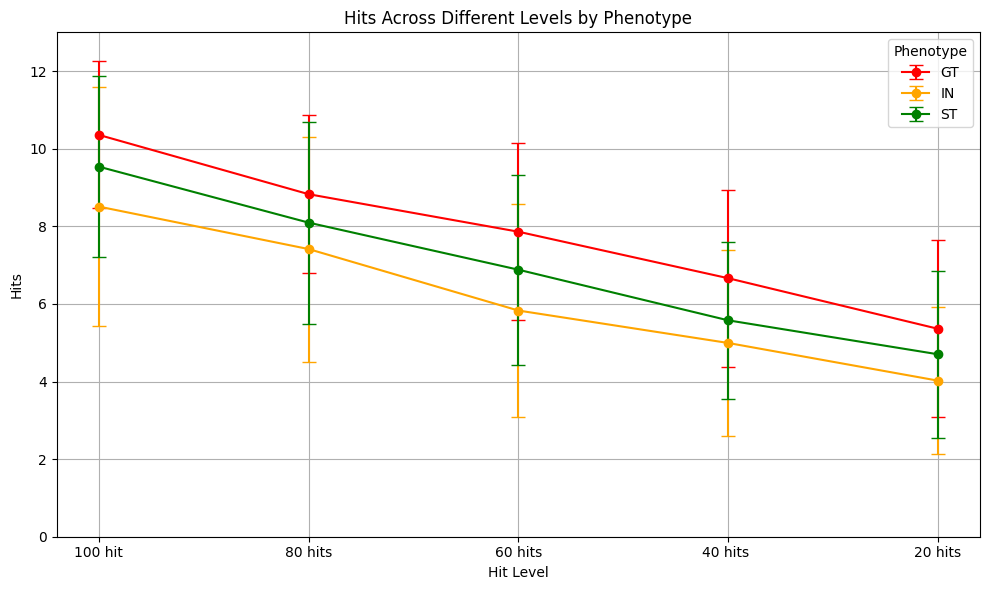

In [13]:
# Filter the columns related to hits
hits_columns = ['100 hit', '80 hits', '60 hits', '40 hits ', '20 hits']
print(df_cleaned.columns)

# Create a new dataframe with only phenotype and the hits columns
df_hits = df_cleaned[['Phenotype'] + hits_columns]

# Group the data by Phenotype and calculate the mean and standard deviation for each hit level
grouped_hits = df_hits.groupby('Phenotype').agg({col: ['mean', 'std'] for col in hits_columns}).reset_index()

# Set colors for the phenotypes again
colors = {'GT': 'red', 'IN': 'orange', 'ST': 'green'}

# Create a line plot for the HITS across different levels (100, 80, 60, 40, 20)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the HITS for each phenotype with error bars
for phenotype in grouped_hits['Phenotype']:
    means = grouped_hits.loc[grouped_hits['Phenotype'] == phenotype, [(col, 'mean') for col in hits_columns]].values.flatten()
    stds = grouped_hits.loc[grouped_hits['Phenotype'] == phenotype, [(col, 'std') for col in hits_columns]].values.flatten()
    
    ax.errorbar(hits_columns, means, yerr=stds, label=phenotype, 
                color=colors[phenotype], capsize=5, marker='o')

# Customize the plot
ax.set_title('Hits Across Different Levels by Phenotype')
ax.set_xlabel('Hit Level')
ax.set_ylabel('Hits')
ax.legend(title="Phenotype")
ax.grid(True)

# Show the plot
plt.ylim(0, 13)
plt.tight_layout()
plt.show()


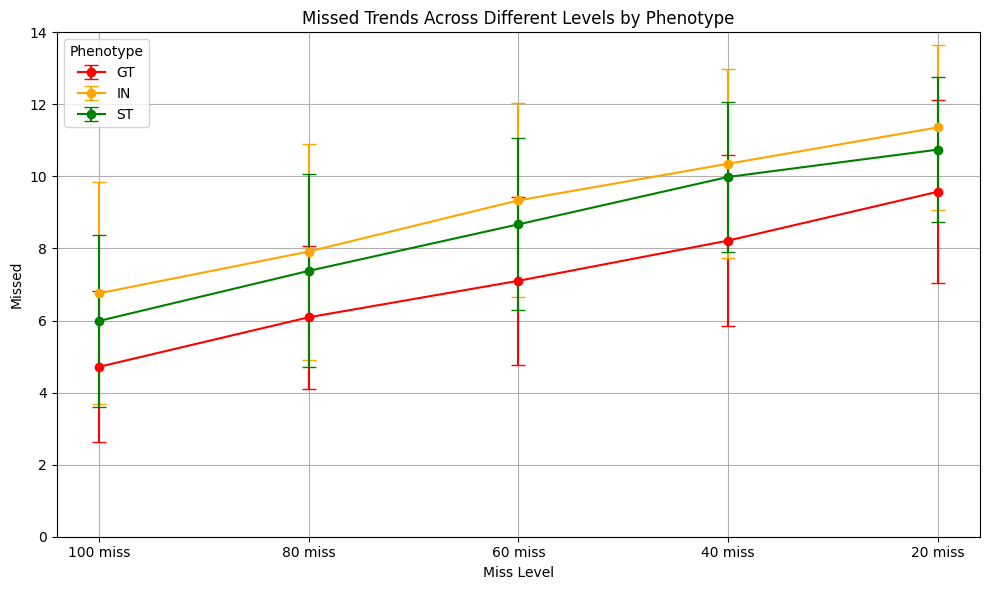

In [22]:
# Filter the columns related to missed
missed_columns = ['100 missed', '80 missed', '60 missed', '40 missed', '20 missed']

# Create a new dataframe with only phenotype and the missed columns
df_missed = df_cleaned[['Phenotype'] + missed_columns]

# Group the data by Phenotype and calculate the mean and standard deviation for each missed level
grouped_missed = df_missed.groupby('Phenotype').agg({col: ['mean', 'std'] for col in missed_columns}).reset_index()

# Create a line plot for the missed data across different levels (100, 80, 60, 40, 20)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the missed data for each phenotype with error bars
for phenotype in grouped_missed['Phenotype']:
    means = grouped_missed.loc[grouped_missed['Phenotype'] == phenotype, [(col, 'mean') for col in missed_columns]].values.flatten()
    stds = grouped_missed.loc[grouped_missed['Phenotype'] == phenotype, [(col, 'std') for col in missed_columns]].values.flatten()
    
    ax.errorbar([col.replace('missed', 'miss') for col in missed_columns], means, yerr=stds, label=phenotype, 
                color=colors[phenotype], capsize=5, marker='o')

# Customize the plot
ax.set_title('Missed Trends Across Different Levels by Phenotype')
ax.set_xlabel('Miss Level')
ax.set_ylabel('Missed')
ax.legend(title="Phenotype")
ax.grid(True)

# Show the plot
plt.ylim(0, 14)
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
from pingouin import mixed_anova, pairwise_ttests, compute_effsize

# Prepare the dataframe in long format, ensuring no column conflicts
df_hits_long = pd.melt(df_hits, id_vars=['Phenotype'], 
                       value_vars=['100 hit', '80 hits', '60 hits', '40 hits ', '20 hits'], 
                       var_name='Hit_Level', 
                       value_name='Hits')

# Ensure the 'Phenotype' and 'Animal ID' columns are properly managed
df_hits_long['Animal ID'] = df_hits_long.groupby('Phenotype').cumcount()

# Check for missing values in the key columns
print("Missing values per column:\n", df_hits_long.isna().sum())

# Drop rows with NaN values (as ANOVA cannot handle missing data)
df_hits_long = df_hits_long.dropna(subset=['Phenotype', 'Hits', 'Hit_Level'])

# Double-check for remaining NaNs
print("After dropping missing values:\n", df_hits_long.isna().sum())

# Perform mixed-design ANOVA (Phenotype as between-subject factor, Hit Level as within-subject factor)
anova_results = mixed_anova(dv='Hits', within='Hit_Level', between='Phenotype', subject='Animal ID', data=df_hits_long)

# Display the ANOVA results
print(anova_results)

# Calculate generalized eta squared for effect size
generalized_eta_squared = compute_effsize(df_hits_long, dv='Hits', within='Hit_Level', between='Phenotype', eftype='ges')
print('Generalized Eta Squared:', generalized_eta_squared)

# Perform post-hoc pairwise tests if significant interaction
if anova_results['p-unc'].min() < 0.05:
    posthoc_results = pairwise_ttests(dv='Hits', within='Hit_Level', between='Phenotype', subject='Animal ID',
                                      data=df_hits_long, padjust='bonf')
    print(posthoc_results)


Missing values per column:
 Phenotype    0
Hit_Level    0
Hits         0
Animal ID    0
dtype: int64
After dropping missing values:
 Phenotype    0
Hit_Level    0
Hits         0
Animal ID    0
dtype: int64


ValueError: cannot convert float NaN to integer

In [36]:
import pandas as pd

# Load the file to check the content of the 'raw' sheet
file_path = 'SAt6.xlsx'
xls = pd.ExcelFile(file_path)

# Checking sheet names to identify the correct sheet
xls.sheet_names

# Loading the 'raw' sheet to inspect the data
raw_data = pd.read_excel(file_path, sheet_name='raw')

# Displaying the first few rows to understand the structure of the data
raw_data.head()

import pingouin as pg

# Restructuring the data for the mixed ANOVA
# Selecting relevant columns: phenotype (Unnamed: 1), animal (Unnamed: 2), and hit levels (100, 80, 60, 40, 20)
data = raw_data[['Unnamed: 1', 'Unnamed: 2', '100 hit', '80 hits', '60 hits', '40 hits ', '20 hits']]

# Renaming the columns for better clarity
data.columns = ['Phenotype', 'Animal', '100_hit', '80_hit', '60_hit', '40_hit', '20_hit']

# Reshaping the data to long format for repeated measures
long_data = pd.melt(data, id_vars=['Phenotype', 'Animal'], 
                    value_vars=['100_hit', '80_hit', '60_hit', '40_hit', '20_hit'],
                    var_name='Hits_Level', value_name='Hits')

# Convert Hits_Level to categorical for ANOVA
long_data['Hits_Level'] = long_data['Hits_Level'].astype('category')

# Performing the mixed design ANOVA
anova_results = pg.mixed_anova(dv='Hits', within='Hits_Level', between='Phenotype', subject='Animal', data=long_data)

anova_results


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Phenotype,69.830274,2,40,34.915137,1.396885,2.591724e-01,NaN,0.065285,NaN,NaN,NaN,NaN
1,Hits_Level,615.812701,4,160,153.953175,169.163010,2.205871e-56,5.866628e-46,0.808762,0.772623,False,0.585186,0.010093
2,Interaction,2.597283,8,160,0.324660,0.356735,9.415772e-01,NaN,0.017524,NaN,NaN,NaN,NaN


In [40]:
import pandas as pd

# Load the file to check the content of the 'raw' sheet
file_path = 'SAt6.xlsx'
xls = pd.ExcelFile(file_path)

# Checking sheet names to identify the correct sheet
xls.sheet_names

# Loading the 'raw' sheet to inspect the data
raw_data = pd.read_excel(file_path, sheet_name='raw')

# Displaying the first few rows to understand the structure of the data
raw_data.head()

import pingouin as pg

# Restructuring the data for the mixed ANOVA
# Selecting relevant columns: phenotype (Unnamed: 1), animal (Unnamed: 2), and hit levels (100, 80, 60, 40, 20)
data = raw_data[['Unnamed: 1', 'Unnamed: 2', '100 missed', '80 missed', '60 missed', '40 missed', '20 missed']]

# Renaming the columns for better clarity
data.columns = ['Phenotype', 'Animal', '100_mis', '80_mis', '60_mis', '40_mis', '20_mis']

# Reshaping the data to long format for repeated measures
long_data = pd.melt(data, id_vars=['Phenotype', 'Animal'], 
                    value_vars=['100_mis', '80_mis', '60_mis', '40_mis', '20_mis'],
                    var_name='mis_Level', value_name='mis')

# Convert Hits_Level to categorical for ANOVA
long_data['mis_Level'] = long_data['mis_Level'].astype('category')

# Performing the mixed design ANOVA
anova_results = pg.mixed_anova(dv='mis', within='mis_Level', between='Phenotype', subject='Animal', data=long_data)

anova_results


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Phenotype,100.975714,2,40,50.487857,1.909467,1.614223e-01,NaN,0.087153,NaN,NaN,NaN,NaN
1,mis_Level,614.325080,4,160,153.581270,172.537555,6.153456e-57,1.115853e-42,0.811798,0.705428,False,0.497814,0.000895
2,Interaction,1.957078,8,160,0.244635,0.274830,9.733495e-01,NaN,0.013555,NaN,NaN,NaN,NaN


In [52]:
import pandas as pd
import pingouin as pg

# Load the data from the Excel file
file_path = 'Sat6.xlsx'  # Replace with your actual file path
raw_data = pd.read_excel(file_path, sheet_name='raw')

# Rename columns for better clarity
new_columns = ['Index', 'Phenotype', 'Animal', 'False_Alarm', 'Correct_reject', '100_hit', '100_missed',
               '80_hit', '80_missed', '60_hit', '60_missed', '40_hit', '40_missed', '20_hit', '20_missed']
new_columns += list(raw_data.columns[len(new_columns):])
raw_data.columns = new_columns

# For False Alarms - Between-subjects factor
data_false_alarm = raw_data[['Phenotype', 'Animal', 'False_Alarm']]

# You can perform a one-way ANOVA to see if False Alarm rates differ by Phenotype
false_alarm_anova = pg.anova(dv='False_Alarm', between='Phenotype', data=data_false_alarm)
print("ANOVA for False Alarm:")
print(false_alarm_anova)



ANOVA for False Alarm:
      Source  ddof1  ddof2         F     p-unc       np2
0  Phenotype      2     40  0.778725  0.465824  0.037477


In [54]:
import pandas as pd
import pingouin as pg

# Load the data from the Excel file
file_path = 'Sat6.xlsx'  # Replace with your actual file path
raw_data = pd.read_excel(file_path, sheet_name='raw')

# Rename columns for better clarity
new_columns = ['Index', 'Phenotype', 'Animal', 'False_Alarm', 'Correct_reject', '100_hit', '100_missed',
               '80_hit', '80_missed', '60_hit', '60_missed', '40_hit', '40_missed', '20_hit', '20_missed']
new_columns += list(raw_data.columns[len(new_columns):])
raw_data.columns = new_columns

# For False Alarms - Between-subjects factor
data_false_alarm = raw_data[['Phenotype', 'Animal', 'Correct_reject']]

# You can perform a one-way ANOVA to see if False Alarm rates differ by Phenotype
false_alarm_anova = pg.anova(dv='Correct_reject', between='Phenotype', data=data_false_alarm)
print("ANOVA for False Alarm:")
print(false_alarm_anova)





ANOVA for False Alarm:
      Source  ddof1  ddof2         F     p-unc       np2
0  Phenotype      2     40  0.040602  0.960251  0.002026
